In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
%matplotlib inline

In [2]:
#import the dataset
raw_data = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
# print the first few rows
raw_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#print the columns
raw_data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
#check for missing values
raw_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Which store has maximum sales


In [6]:
#group the entire dataset
sales_group = raw_data.groupby(by=['Store']).sum()
sales_group


group_total_store = raw_data[['Store','Weekly_Sales']]
group_total_store

#group sales by store
group_by_store = group_total_store.groupby(by=['Store']).sum()
group_by_store = group_by_store.sort_values(by=['Weekly_Sales'],ascending=False)
group_by_store

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


The store number 20 has the maximun of sales.

### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [7]:
#group by store and then find the standard deviation of each store

df_std = pd.DataFrame(raw_data.groupby('Store').agg({'Weekly_Sales':['std','mean']}))
df_std

Weekly_Sales              
                 std          mean
Store                             
1      155980.767761  1.555264e+06
2      237683.694682  1.925751e+06
3       46319.631557  4.027044e+05
4      266201.442297  2.094713e+06
5       37737.965745  3.180118e+05
6      212525.855862  1.564728e+06
7      112585.469220  5.706173e+05
8      106280.829881  9.087495e+05
9       69028.666585  5.439806e+05
10     302262.062504  1.899425e+06
11     165833.887863  1.356383e+06
12     139166.871880  1.009002e+06
13     265506.995776  2.003620e+06
14     317569.949476  2.020978e+06
15     120538.652043  6.233125e+05
16      85769.680133  5.192477e+05
17     112162.936087  8.935814e+05
18     176641.510839  1.084718e+06
19     191722.638730  1.444999e+06
20     275900.562742  2.107677e+06
21     128752.812853  7.560691e+05
22     161251.350631  1.028501e+06
23     249788.038068  1.389864e+06
24     167745.677567  1.356755e+06
25     112976.788600  7.067215e+05
26     110431.288141  1.002912e+06
27     239930.135688  1.775216e+06
28     181758.967539  1.323522e+06
29      99120.136596  5.394514e+05
30      22809.665590  4.385796e+05
31     125855.942933  1.395901e+06
32     138017.252087  1.166568e+06
33      24132.927322  2.598617e+05
34     104630.164676  9.667816e+05
35     211243.457791  9.197250e+05
36      60725.173579  3.735120e+05
37      21837.461190  5.189003e+05
38      42768.169450  3.857317e+05
39     217466.454833  1.450668e+06
40     119002.112858  9.641280e+05
41     187907.162766  1.268125e+06
42      50262.925530  5.564039e+05
43      40598.413260  6.333247e+05
44      24762.832015  3.027489e+05
45     130168.526635  7.859814e+05

In [8]:
df_std['Weekly_Sales','std'].max()

df_std.loc[df_std[('Weekly_Sales','std')]==df_std[('Weekly_Sales','std')].max()]

Weekly_Sales              
                 std          mean
Store                             
14     317569.949476  2.020978e+06

The store 14 has the maximun standard deviation.

### Which store/s has good quarterly growth rate in Q3’2012


In [9]:
#converte the Date column to datetime
raw_data.Date = pd.to_datetime(raw_data.Date)
#raw_data.Date 

In [10]:
#slide the dataset to get the Q2 saes
q2 = raw_data[(raw_data['Date']>='2012-04-01') & (raw_data['Date']<='2012-06-30')]

#slide the dataset to get the Q3 sales
q3 = raw_data[(raw_data['Date']>='2012-07-01') & (raw_data['Date']<='2012-09-30')]
q3


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.059189,7.348
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908
...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,2012-07-09,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684


In [11]:
#finding the sum weekly sales of each store in Q2
q2_sales= pd.DataFrame(q2.groupby('Store')['Weekly_Sales'].sum())
q2_sales.reset_index(inplace=True)
q2_sales.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)
q2_sales.head()


,Store,Q2_Weekly_Sales
0,1,21036965.58
1,2,25085123.61
2,3,5562668.16
3,4,28384185.16
4,5,4427262.21


In [12]:
#finding the sum weekly sales of each store in Q3
q3_sales = pd.DataFrame(q3.groupby(by=['Store'])['Weekly_Sales'].sum())
q3_sales.reset_index(inplace=True)
q3_sales.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)
q3_sales.head()


#grouwth_rate = q3_rate.groupby(by=['Store']).sum()
#grouwth_rate.sort_values(by=['Weekly_Sales'], ascending=False)

,Store,Q3_Weekly_Sales
0,1,18633209.98
1,2,22396867.61
2,3,4966495.93
3,4,25652119.35
4,5,3880621.88


In [13]:
#mergeing Q2 and Q3 data on Store as a common column
q3_Growth= q2_sales.merge(q3_sales,how='inner',on='Store')
q3_Growth.head()


,Store,Q2_Weekly_Sales,Q3_Weekly_Sales
0,1,21036965.58,18633209.98
1,2,25085123.61,22396867.61
2,3,5562668.16,4966495.93
3,4,28384185.16,25652119.35
4,5,4427262.21,3880621.88


In [14]:
##### Calculating Growth rate of each Store. Formula (q3-q2)/q2*100
q3_Growth['Growth_Rate'] = (q3_Growth['Q3_Weekly_Sales'] - q3_Growth['Q2_Weekly_Sales'])/ q3_Growth['Q2_Weekly_Sales']


q3_Growth['Groth_Rate']= round(q3_Growth['Growth_Rate'],2)
q3_Growth.sort_values('Growth_Rate',ascending=False).head()

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate,Groth_Rate
15,16,6626133.44,6441311.11,-0.027893,-0.03
6,7,7613593.92,7322393.92,-0.038247,-0.04
34,35,10753570.97,10252122.68,-0.046631,-0.05
25,26,13218289.66,12417575.35,-0.060576,-0.06
38,39,20191585.63,18899955.17,-0.063969,-0.06


The store 16 has the better growth rate in Q3’2012

### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together



In [15]:
#split the dataset into holidays and non-holidays dataset

#holidays dattaset
holidays_df = raw_data[raw_data['Holiday_Flag']==1]
holidays_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424


In [16]:
#non hilidays dataset
non_holidays_df= raw_data[raw_data['Holiday_Flag']==0]
non_holidays_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [17]:
#find the mean sales in non-holiday season for all stores together 
non_holidays_sales_mean = non_holidays_df['Weekly_Sales'].mean()
print(f'The non holidays sales mean is:{non_holidays_sales_mean:.02f}')

The non holidays sales mean is:1041256.38


In [18]:
#holidays which have higher sales than the mean sales in non-holiday season 
holidays_high_sales = holidays_df[holidays_df['Weekly_Sales'] > non_holidays_sales_mean]
holidays_high_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724


### Provide a monthly and semester view of sales in units and give insights

Text(0, 0.5, 'Weekly_Sales')

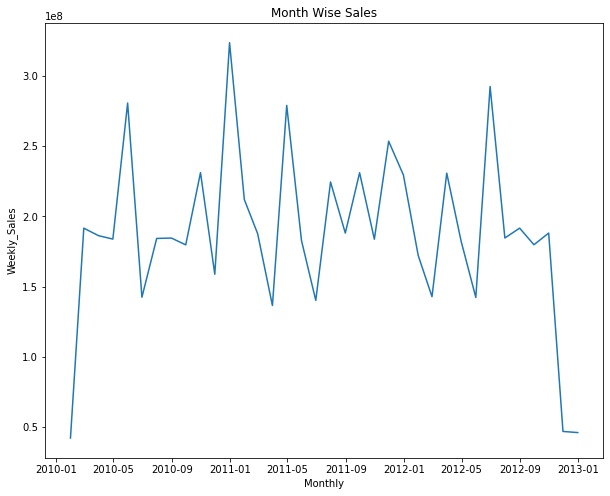

In [19]:
#Monthly sales 
monthly = raw_data.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

In [20]:
#Sales by semester
semester = raw_data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
semester = semester.reset_index()
semester

,Date,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-01-31,1035,4.223988e+07,0,3144.06,123.045,7575.961790,381.388
1,2010-07-31,25875,1.168939e+09,0,69038.76,3163.802,188910.091258,9572.073
2,2011-01-31,27945,1.289673e+09,180,68333.54,3561.511,204805.873519,10241.257
3,2011-07-31,25875,1.150555e+09,0,68591.32,4090.563,192568.764647,9154.793
4,2012-01-31,26910,1.257900e+09,180,67437.09,4121.914,202091.223320,9254.220
5,2012-07-31,25875,1.175370e+09,45,72217.70,4172.336,197334.598250,8308.787
6,2013-01-31,14490,6.525423e+08,45,41608.97,2379.464,110820.451632,4562.019


Text(0, 0.5, 'Weekly_Sales')

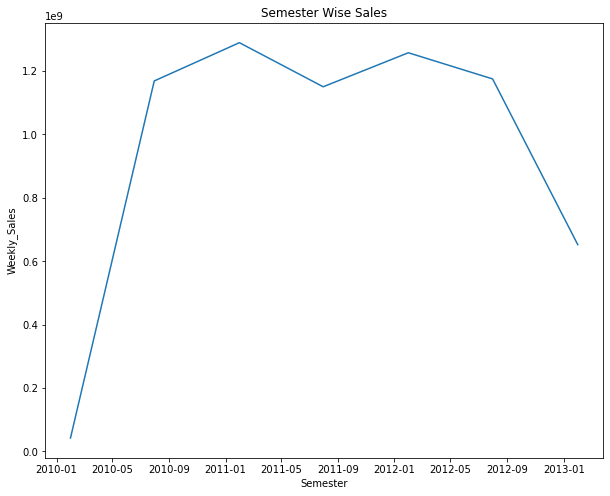

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
X = semester['Date']
Y = semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

### For Store 1 – Build  prediction models to forecast demand

In [22]:
#encoding the column data
from sklearn.preprocessing import LabelEncoder
LabEncoder = LabelEncoder()

#get the store 1 data
store_1 = raw_data[raw_data['Store']==1]
store_1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


In [23]:
#encode the date column

store_1['New_date'] = LabEncoder.fit_transform(store_1['Date'])
store_1

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,New_date
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,13
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,42
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,14
...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,136
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,116
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,142
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,139


In [24]:
#drop columns
store_1.drop(['Store','Date','Holiday_Flag'],axis=1 , inplace = True)
store_1.head()

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,New_date
0,1643690.90,42.31,2.572,211.096358,8.106,13
1,1641957.44,38.51,2.548,211.242170,8.106,42
2,1611968.17,39.93,2.514,211.289143,8.106,3
3,1409727.59,46.63,2.561,211.319643,8.106,4
4,1554806.68,46.50,2.625,211.350143,8.106,14


In [25]:
#get Correlation matrix of Variables.
corrmatrix = store_1.corr()
print("Correlation matrix is : ")
print(corrmatrix)

Correlation matrix is : 
              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment  \
Weekly_Sales      1.000000    -0.222701    0.124592  0.225408     -0.097955   
Temperature      -0.222701     1.000000    0.228493  0.118503     -0.180695   
Fuel_Price        0.124592     0.228493    1.000000  0.755259     -0.513944   
CPI               0.225408     0.118503    0.755259  1.000000     -0.813471   
Unemployment     -0.097955    -0.180695   -0.513944 -0.813471      1.000000   
New_date          0.217580     0.092154    0.774288  0.943272     -0.771032   

              New_date  
Weekly_Sales  0.217580  
Temperature   0.092154  
Fuel_Price    0.774288  
CPI           0.943272  
Unemployment -0.771032  
New_date      1.000000  


<AxesSubplot:>

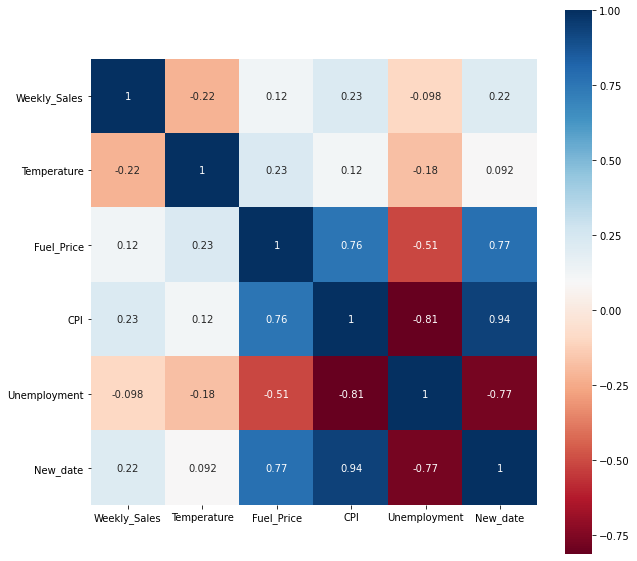

In [32]:
#create a heatmap
plt.figure(figsize = (10,10))
sns.heatmap(store_1.corr(), cmap='RdBu', cbar= True, square= True, annot= True)

In [78]:
#calculate the VIF drop column with vif > 5 or 7 or 10
def calc_vif(x_df):
    vif_dict = {}
    cols = list(x_df.columns)
    for col in cols:
        features_df = x_df.drop(columns = col)
        label_df = x_df[col]
        vif_reg = LinearRegression(fit_intercept=True)
        vif_reg.fit(features, label)
        vif_pred = vif_reg.predict(features)
        vif_r2 = r2_score(label, vif_pred)
        vif = 1/(1 - vif_r2)
        print(col,vif)
        
calc_vif(store_1.drop(columns='Weekly_Sales'))

Temperature 1.1488590230876077
Fuel_Price 1.1488590230876077
CPI 1.1488590230876077
Unemployment 1.1488590230876077
New_date 1.1488590230876077


In [71]:
#let's drop n columns
df_model = store_1[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','New_date']]
df_model.shape

#let's drop Fuel_Price and CPI
#df_model = store_1[['Weekly_Sales','Temperature','Unemployment','New_date']]
#df_model.shape

#now let's drop Fuel_price, CPI, unemployement
#df_model = store_1[['Weekly_Sales','Temperature','New_date']]
#df_model.shape

(143, 6)

In [72]:
from sklearn.model_selection import train_test_split
features = df_model.drop('Weekly_Sales',axis=1)
label = df_model['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state = 43)

In [73]:
from sklearn.linear_model import LinearRegression
line_model = LinearRegression()
line_model.fit(X_train,y_train)

LinearRegression()

In [74]:
#make a prediction on y_train
y_train_predict = line_model.predict(X_train)
y_train_predict = y_train_predict.round(2)
y_train_predict


##Prediction
predict_val = line_model.predict(X_test)
predict_val = predict_val.round(2)
predict_val




array([1623988.52, 1554079.26, 1664530.46, 1602037.11, 1564631.26,
       1506696.95, 1643608.17, 1554672.34, 1542187.76, 1596860.37,
       1553970.72, 1522273.05, 1618993.56, 1534592.27, 1568621.47,
       1525251.47, 1587130.23, 1555215.97, 1558636.45, 1477159.36,
       1502994.93, 1631451.39, 1564141.67, 1484733.04, 1501166.71,
       1581644.61, 1474951.31, 1612211.07, 1512208.12])

In [75]:
df_act_pred = pd.DataFrame({"Actual Sales" : y_test, "Predicted Sales": predict_val})
df_act_pred.head()

,Actual Sales,Predicted Sales
92,1594938.89,1623988.52
55,1456800.28,1554079.26
98,2270188.99,1664530.46
90,1445249.09,1602037.11
56,1636263.41,1564631.26


### how good is the model
#### get the R-square and the root mean squared error
##### The higther the r-squred is the better is the model

In [76]:
from sklearn.metrics import r2_score, mean_squared_error

r2_value = r2_score(y_test, predict_val)
rmse = mean_squared_error(y_test, predict_val, squared= False)

print('Training Data Metrics')
print(f'R2 value {r2_value:.02f}')
print(f'Root Mean Squared Error {rmse:.02f}')

Training Data Metrics
R2 value 0.19
Root Mean Squared Error 153499.66


In [77]:
#R- squared on the training dataset
y_train_r2_value = r2_score(y_train, y_train_predict)
y_train_rmse = mean_squared_error(y_train, y_train_predict, squared= False)

print('Training Data Metrics')
print(f'R2 value {y_train_r2_value:.02f}')
print(f'Root Mean Squared Error {y_train_rmse:.02f}')

Training Data Metrics
R2 value 0.10
Root Mean Squared Error 143531.12


### Scale the data

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [86]:
#predict withthe scale data
line_model = LinearRegression(fit_intercept=True)
line_model.fit(X_train,y_train)

LinearRegression()

In [87]:
#make a prediction on y_train
y_train_predict = line_model.predict(X_train)
y_train_predict = y_train_predict.round(2)
y_train_predict


##Prediction
predict_val = line_model.predict(X_test)
predict_val = predict_val.round(2)
predict_val


r2_value = r2_score(y_test, predict_val)
rmse = mean_squared_error(y_test, predict_val, squared= False)

print('Training Data Metrics')
print(f'R2 value {r2_value:.02f}')
print(f'Root Mean Squared Error {rmse:.02f}')


#R- squared on the training dataset
y_train_r2_value = r2_score(y_train, y_train_predict)
y_train_rmse = mean_squared_error(y_train, y_train_predict, squared= False)

print('Training Data Metrics')
print(f'R2 value {y_train_r2_value:.02f}')
print(f'Root Mean Squared Error {y_train_rmse:.02f}')

Training Data Metrics
R2 value 0.19
Root Mean Squared Error 152641.41
Training Data Metrics
R2 value 0.10
Root Mean Squared Error 143531.12
